_**DELETE BEFORE PUBLISHING**_

_This is a template also containing the style guide for use cases. The styling uses the use-case css when uploaded to the website, which will not be visible on your local machine._

_Change any text marked with {} and delete any cells marked DELETE_

***

In [1]:
# DELETE BEFORE PUBLISHING
# This is just here so you can preview the styling on your local machine

from IPython.core.display import HTML
HTML("""
<style>
.usecase-title, .usecase-duration, .usecase-section-header {
    padding-left: 15px;
    padding-bottom: 10px;
    padding-top: 10px;
    padding-right: 15px;
    background-color: #0f9295;
    color: #fff;
}

.usecase-title {
    font-size: 1.7em;
    font-weight: bold;
}

.usecase-authors, .usecase-level, .usecase-skill {
    padding-left: 15px;
    padding-bottom: 7px;
    padding-top: 7px;
    background-color: #baeaeb;
    font-size: 1.4em;
    color: #121212;
}

.usecase-level-skill  {
    display: flex;
}

.usecase-level, .usecase-skill {
    width: 50%;
}

.usecase-duration, .usecase-skill {
    text-align: right;
    padding-right: 15px;
    padding-bottom: 8px;
    font-size: 1.4em;
}

.usecase-section-header {
    font-weight: bold;
    font-size: 1.5em;
}

.usecase-subsection-header, .usecase-subsection-blurb {
    font-weight: bold;
    font-size: 1.2em;
    color: #121212;
}

.usecase-subsection-blurb {
    font-size: 1em;
    font-style: italic;
}
</style>
""")

<div class="usecase-title"><b>Weather Condition Classification</b></div>

<div class="usecase-authors"><b>Authored by: </b>Aremu Akintomiwa James</div>

<div class="usecase-duration"><b>Duration:</b> {90} mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>{Intermediate}</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>Python, Data analysis, Machine Learning, Basic Meteorology</div>
</div>

<div class="usecase-section-header"><b>Scenario</b></div>

 As an urban planner or agricultural manager, I need to accurately classify different weather conditions using environmental features to determine the optimal times for infrastructure projects and agricultural activities. This will ensure that operations are conducted under favorable weather conditions, thereby providing actionable insights for planning and decision-making.



<div class="usecase-section-header"><b>What this use case will teach you</b></div>

At the end of this use case you will:
- Understand how to preprocess and analyze environmental data.
- Learn how to build and evaluate a machine learning model for classification tasks.
- Gain experience in feature selection and engineering for weather-related datasets.
- Develop skills in using Python libraries such as Pandas, Scikit-learn, and Matplotlib.
- Understand the importance of accurate weather classification for planning and decision-making in various sectors.


<div class="usecase-section-header"><b> introduction</b></div>

In this use case, we aim to develop a robust machine learning model capable of accurately classifying various weather conditions such as sunny, cloudy, rainy, and stormy using environmental features. These features include ambient air temperature, relative humidity, atmospheric pressure, wind speed and direction, and gust wind speed. Accurate weather classification is important for optimizing the timing of infrastructure projects and agricultural activities, ensuring that operations are conducted under favorable weather conditions. By leveraging machine learning techniques, we can provide actionable insights for planning and decision-making.



<div class="usecase-section-header"><b>Background</b></div>

Weather conditions have a significant impact on various sectors, including agriculture, construction, and transportation. Accurate weather forecasts and classifications can help in planning and executing operations more efficiently. For instance, farmers can optimize planting and harvesting times based on expected weather conditions, while construction projects can be scheduled to avoid adverse weather that could delay progress or compromise safety.

In this project, we will use historical weather data from Melbourne's open data portal. The datasets include:
- Microclimate sensors data — CoM Open Data Portal (melbourne.vic.gov.au)
- Argyle Square Weather Stations (Historical Data) — CoM Open Data Portal (melbourne.vic.gov.au)

- Argyle Square Air Quality — CoM Open Data Portal (melbourne.vic.gov.au)


<div class="usecase-section-header"><b>Dataset Information</b></div>

The dataset for this project includes the following features::
- Ambient air temperature (°C)
- Relative humidity (%)
- Atmospheric pressure (hPa)
- Wind speed (m/s)
- Wind direction (degrees)
- Gust wind speed (m/s)


These features will be used to classify weather conditions into categories such as sunny, cloudy, rainy, and stormy. The dataset will be preprocessed to handle any missing values, outliers, or inconsistencies before being used to train the machine learning model.

In [2]:
#dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# **Preferred Method**: Export Endpoint
import requests
from io import StringIO


def API_unlimited(datasetName):

    dataset_id = datasetName
    # https://data.melbourne.vic.gov.au/explore/dataset/pedestrian-counting-system-monthly-counts-per-hour/information/
    #dataset_id = 'pedestrian-counting-system-monthly-counts-per-hour'
    
    base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
    #apikey = api_key
    dataset_id = dataset_id
    format = 'csv'
    
    url = f'{base_url}{dataset_id}/exports/{format}'
    params = {
        'select': '*',
        'limit': -1,  # all records
        'lang': 'en',
        'timezone': 'UTC',
       # 'api_key': apikey
    }
    
    # GET request
    response = requests.get(url, params=params)
    
    if response.status_code == 200:
        # StringIO to read the CSV data
        url_content = response.content.decode('utf-8')
        datasetName = pd.read_csv(StringIO(url_content), delimiter=';')
        print(datasetName.sample(10, random_state=999)) # Test
        return datasetName
    else:
        print(f'Request failed with status code {response.status_code}')

In [4]:
dataset_id_1 = 'microclimate-sensors-data'
dataset_id_2 = 'meshed-sensor-type-1'
dataset_id_3 = 'argyle-square-air-quality'

dataset1 = API_unlimited(dataset_id_1)

                device_id                received_at  \
49578  ICTMicroclimate-08  2024-08-04T06:06:46+00:00   
15478  ICTMicroclimate-03  2024-06-21T09:12:26+00:00   
28785  ICTMicroclimate-09  2024-06-07T03:54:15+00:00   
45156  ICTMicroclimate-07  2024-07-23T19:11:12+00:00   
42318           aws5-0999  2024-07-19T11:12:03+00:00   
17099  ICTMicroclimate-06  2024-06-23T14:48:07+00:00   
42411  ICTMicroclimate-03  2024-07-20T00:13:49+00:00   
14146           aws5-0999  2024-06-12T01:20:04+00:00   
21869  ICTMicroclimate-01  2024-07-04T05:26:56+00:00   
28282  ICTMicroclimate-09  2024-06-03T17:13:16+00:00   

                                          sensorlocation  \
49578  Swanston St - Tram Stop 13 adjacent Federation...   
15478                                        CH1 rooftop   
28785  SkyFarm (Jeff's Shed). Rooftop - Melbourne Con...   
45156  Tram Stop 7C - Melbourne Tennis Centre Precinc...   
42318                       Royal Park Asset ID: COM2707   
17099  Tram Stop 7B - M

In [5]:
dataset2 = API_unlimited(dataset_id_2)

              dev_id                       time         rtc  battery  \
115328  atmos41-32fc  2024-06-26T09:43:16+00:00  85385230.0    4.183   
15477   atmos41-32fc  2021-12-13T04:17:15+00:00   5359576.0    4.202   
77696   atmos41-32fc  2023-03-15T11:14:50+00:00  44869274.0    4.186   
35938   atmos41-32fc  2021-05-01T03:53:25+00:00   8915370.0    4.208   
56784   atmos41-32fc  2022-04-07T21:53:08+00:00  15358909.0    4.167   
27172   atmos41-32fc  2021-01-18T11:26:48+00:00     43398.0    4.172   
20869   atmos41-32fc  2021-09-21T16:36:54+00:00  21316300.0    4.155   
64157   atmos41-32fc  2022-11-28T19:41:44+00:00  35654915.0    4.142   
70113   atmos41-32fc  2023-02-13T22:13:05+00:00  42316781.0    4.200   
103388  atmos41-32fc  2024-01-25T21:12:27+00:00  72207430.0    4.168   

        solarpanel  command  solar  precipitation  strikes  windspeed  \
115328       0.902      0.0    0.0            0.0      0.0       0.50   
15477       19.977      0.0  833.0            0.0      0.0   

In [6]:
dataset3 = API_unlimited(dataset_id_3)

                             time    dev_id           sensor_name  \
33731   2020-06-11T16:21:52+00:00  ems-ce10  Air Quality Sensor 1   
58139   2021-07-10T10:57:51+00:00  ems-ce10  Air Quality Sensor 1   
107044  2022-06-09T20:34:51+00:00  ems-ec8a  Air Quality Sensor 2   
86091   2020-11-29T11:46:53+00:00  ems-ec8a  Air Quality Sensor 2   
142270  2024-06-23T01:38:09+00:00  ems-ec8a  Air Quality Sensor 2   
1659    2021-05-20T03:25:01+00:00  ems-ce10  Air Quality Sensor 1   
137971  2024-04-05T18:50:31+00:00  ems-ec8a  Air Quality Sensor 2   
2464    2020-07-12T19:39:43+00:00  ems-ec8a  Air Quality Sensor 2   
124252  2023-02-10T03:12:05+00:00  ems-ec8a  Air Quality Sensor 2   
117136  2022-11-03T14:55:29+00:00  ems-ec8a  Air Quality Sensor 2   

                       lat_long  averagespl  carbonmonoxide  humidity  ibatt  \
33731   -37.802772, 144.9655513        55.0         -2037.0      89.0  163.0   
58139   -37.802772, 144.9655513        62.0         -3058.0     100.0  138.0   


In [7]:
dataset1.head()

,device_id,received_at,sensorlocation,latlong,minimumwinddirection,averagewinddirection,maximumwinddirection,minimumwindspeed,averagewindspeed,gustwindspeed,airtemperature,relativehumidity,atmosphericpressure,pm25,pm10,noise
0,ICTMicroclimate-09,2024-07-17T15:33:32+00:00,SkyFarm (Jeff's Shed). Rooftop - Melbourne Con...,"-37.8223306, 144.9521696",0.0,300.0,359.0,0.0,0.9,3.5,8.7,86.3,1013.1,1.0,4.0,63.1
1,ICTMicroclimate-03,2024-07-17T15:06:13+00:00,CH1 rooftop,"-37.8140348, 144.96728",0.0,308.0,349.0,0.0,0.4,1.0,8.5,99.0,1008.7,3.0,5.0,69.7
2,ICTMicroclimate-07,2024-07-17T15:21:33+00:00,Tram Stop 7C - Melbourne Tennis Centre Precinc...,"-37.8222341, 144.9829409",0.0,262.0,354.0,0.0,0.4,1.6,9.0,85.0,1016.1,0.0,0.0,55.3
3,ICTMicroclimate-08,2024-07-17T15:40:34+00:00,Swanston St - Tram Stop 13 adjacent Federation...,"-37.8184515, 144.9678474",0.0,339.0,359.0,0.0,0.9,4.3,9.0,83.9,1014.1,1.0,1.0,60.6
4,ICTMicroclimate-02,2024-07-17T15:42:47+00:00,101 Collins St L11 Rooftop,"-37.814604, 144.9702991",7.0,118.0,261.0,1.4,2.1,4.1,9.0,96.7,1009.4,8.0,11.0,69.0


In [8]:
dataset1.shape

(49744, 16)

In [9]:
dataset1.columns

Index(['device_id', 'received_at', 'sensorlocation', 'latlong',
       'minimumwinddirection', 'averagewinddirection', 'maximumwinddirection',
       'minimumwindspeed', 'averagewindspeed', 'gustwindspeed',
       'airtemperature', 'relativehumidity', 'atmosphericpressure', 'pm25',
       'pm10', 'noise'],
      dtype='object')

In [10]:
dataset2.head()

,dev_id,time,rtc,battery,solarpanel,command,solar,precipitation,strikes,windspeed,winddirection,gustspeed,vapourpressure,atmosphericpressure,relativehumidity,airtemp,lat_long,sensor_name
0,atmos41-32fc,2021-05-14T18:11:23+00:00,10090042.0,4.161,0.024,0.0,0.0,0.0,0.0,4.09,253.5,10.74,0.93,100.70,88.0,7.8,"-37.8022141, 144.9656262",Weather Station
1,atmos41-32fc,2022-05-03T10:25:31+00:00,17564045.0,4.181,0.000,0.0,0.0,0.0,0.0,0.54,158.5,1.14,1.25,100.91,68.0,16.2,"-37.8022141, 144.9656262",Weather Station
2,atmos41-32fc,2022-05-03T21:42:23+00:00,17604657.0,4.143,20.670,0.0,24.0,0.0,0.0,0.76,7.7,2.43,1.21,100.83,75.0,14.0,"-37.8022141, 144.9656262",Weather Station
3,atmos41-32fc,2022-05-04T00:42:43+00:00,17615477.0,4.208,20.694,0.0,68.0,0.0,0.0,1.01,9.9,3.22,1.17,100.91,76.0,13.4,"-37.8022141, 144.9656262",Weather Station
4,atmos41-32fc,2021-05-15T07:55:22+00:00,10139481.0,4.197,0.128,0.0,0.0,0.0,0.0,2.66,253.8,8.07,0.78,101.63,56.0,11.7,"-37.8022141, 144.9656262",Weather Station


In [11]:
dataset2.shape

(119662, 18)

In [12]:
dataset2.columns

Index(['dev_id', 'time', 'rtc', 'battery', 'solarpanel', 'command', 'solar',
       'precipitation', 'strikes', 'windspeed', 'winddirection', 'gustspeed',
       'vapourpressure', 'atmosphericpressure', 'relativehumidity', 'airtemp',
       'lat_long', 'sensor_name'],
      dtype='object')

In [13]:
dataset3.head()

,time,dev_id,sensor_name,lat_long,averagespl,carbonmonoxide,humidity,ibatt,nitrogendioxide,ozone,particulateserr,particulatesvsn,peakspl,pm1,pm10,pm25,temperature,vbatt,vpanel
0,2020-06-09T09:02:38+00:00,ems-ec8a,Air Quality Sensor 2,"-37.802772, 144.9655513",56.0,-6448.0,65.0,71.0,287.0,137.0,0.0,151.0,69.0,12.0,19.0,17.0,12.3,3.96,0.00
1,2020-06-09T11:17:37+00:00,ems-ec8a,Air Quality Sensor 2,"-37.802772, 144.9655513",55.0,-6916.0,68.0,89.0,325.0,156.0,0.0,151.0,62.0,15.0,24.0,22.0,10.9,3.93,0.00
2,2022-05-03T21:46:34+00:00,ems-ec8a,Air Quality Sensor 2,"-37.802772, 144.9655513",58.0,-6261.0,77.0,169.0,268.0,137.0,0.0,151.0,64.0,0.0,0.0,0.0,15.1,3.76,16.33
3,2020-06-09T11:32:37+00:00,ems-ec8a,Air Quality Sensor 2,"-37.802772, 144.9655513",55.0,-6916.0,69.0,76.0,325.0,156.0,0.0,151.0,68.0,19.0,29.0,24.0,10.5,3.92,0.00
4,2021-05-15T06:04:33+00:00,ems-ec8a,Air Quality Sensor 2,"-37.802772, 144.9655513",56.0,-6261.0,51.0,12.0,258.0,119.0,0.0,151.0,62.0,0.0,0.0,0.0,14.9,4.01,18.33


In [14]:
dataset3.shape

(142507, 19)

In [15]:
dataset3.columns

Index(['time', 'dev_id', 'sensor_name', 'lat_long', 'averagespl',
       'carbonmonoxide', 'humidity', 'ibatt', 'nitrogendioxide', 'ozone',
       'particulateserr', 'particulatesvsn', 'peakspl', 'pm1', 'pm10', 'pm25',
       'temperature', 'vbatt', 'vpanel'],
      dtype='object')

#### standardizing column names for dataset1

In [16]:
dataset1 = dataset1.rename(columns={'received_at':'time', 'latlong':'lat_long', 'minimumwinddirection':'min_wind_direction', 'averagewinddirection':'avg_wind_direction', 'maximumwinddirection':'max_wind_direction', 
                        'minimumwindspeed':'min_wind_speed', 'averagewindspeed':'avg_wind_speed', 'gustwindspeed':'gust_wind_speed',
          'airtemperature':'air_temp', 'relativehumidity':'humidity', 'atmosphericpressure':'atm_pressure'})
dataset1.head()

,device_id,time,sensorlocation,lat_long,min_wind_direction,avg_wind_direction,max_wind_direction,min_wind_speed,avg_wind_speed,gust_wind_speed,air_temp,humidity,atm_pressure,pm25,pm10,noise
0,ICTMicroclimate-09,2024-07-17T15:33:32+00:00,SkyFarm (Jeff's Shed). Rooftop - Melbourne Con...,"-37.8223306, 144.9521696",0.0,300.0,359.0,0.0,0.9,3.5,8.7,86.3,1013.1,1.0,4.0,63.1
1,ICTMicroclimate-03,2024-07-17T15:06:13+00:00,CH1 rooftop,"-37.8140348, 144.96728",0.0,308.0,349.0,0.0,0.4,1.0,8.5,99.0,1008.7,3.0,5.0,69.7
2,ICTMicroclimate-07,2024-07-17T15:21:33+00:00,Tram Stop 7C - Melbourne Tennis Centre Precinc...,"-37.8222341, 144.9829409",0.0,262.0,354.0,0.0,0.4,1.6,9.0,85.0,1016.1,0.0,0.0,55.3
3,ICTMicroclimate-08,2024-07-17T15:40:34+00:00,Swanston St - Tram Stop 13 adjacent Federation...,"-37.8184515, 144.9678474",0.0,339.0,359.0,0.0,0.9,4.3,9.0,83.9,1014.1,1.0,1.0,60.6
4,ICTMicroclimate-02,2024-07-17T15:42:47+00:00,101 Collins St L11 Rooftop,"-37.814604, 144.9702991",7.0,118.0,261.0,1.4,2.1,4.1,9.0,96.7,1009.4,8.0,11.0,69.0


#### atandersizing column names for datasets2

In [17]:
dataset2 =dataset2.rename(columns={'windspeed':'avg_wind_speed', 'winddirection':'avg_wind_direction', 'gustspeed':'gust_wind_speed',
           'atmosphericpressure':'atm_pressure', 'relativehumidity':'humidity', 'airtemp':'air_temp'})
dataset2.head()

,dev_id,time,rtc,battery,solarpanel,command,solar,precipitation,strikes,avg_wind_speed,avg_wind_direction,gust_wind_speed,vapourpressure,atm_pressure,humidity,air_temp,lat_long,sensor_name
0,atmos41-32fc,2021-05-14T18:11:23+00:00,10090042.0,4.161,0.024,0.0,0.0,0.0,0.0,4.09,253.5,10.74,0.93,100.70,88.0,7.8,"-37.8022141, 144.9656262",Weather Station
1,atmos41-32fc,2022-05-03T10:25:31+00:00,17564045.0,4.181,0.000,0.0,0.0,0.0,0.0,0.54,158.5,1.14,1.25,100.91,68.0,16.2,"-37.8022141, 144.9656262",Weather Station
2,atmos41-32fc,2022-05-03T21:42:23+00:00,17604657.0,4.143,20.670,0.0,24.0,0.0,0.0,0.76,7.7,2.43,1.21,100.83,75.0,14.0,"-37.8022141, 144.9656262",Weather Station
3,atmos41-32fc,2022-05-04T00:42:43+00:00,17615477.0,4.208,20.694,0.0,68.0,0.0,0.0,1.01,9.9,3.22,1.17,100.91,76.0,13.4,"-37.8022141, 144.9656262",Weather Station
4,atmos41-32fc,2021-05-15T07:55:22+00:00,10139481.0,4.197,0.128,0.0,0.0,0.0,0.0,2.66,253.8,8.07,0.78,101.63,56.0,11.7,"-37.8022141, 144.9656262",Weather Station


#### standersizing column names for datasets3

In [18]:
dataset3.rename(columns={'temperature':'air_temp',})
dataset3.head()

,time,dev_id,sensor_name,lat_long,averagespl,carbonmonoxide,humidity,ibatt,nitrogendioxide,ozone,particulateserr,particulatesvsn,peakspl,pm1,pm10,pm25,temperature,vbatt,vpanel
0,2020-06-09T09:02:38+00:00,ems-ec8a,Air Quality Sensor 2,"-37.802772, 144.9655513",56.0,-6448.0,65.0,71.0,287.0,137.0,0.0,151.0,69.0,12.0,19.0,17.0,12.3,3.96,0.00
1,2020-06-09T11:17:37+00:00,ems-ec8a,Air Quality Sensor 2,"-37.802772, 144.9655513",55.0,-6916.0,68.0,89.0,325.0,156.0,0.0,151.0,62.0,15.0,24.0,22.0,10.9,3.93,0.00
2,2022-05-03T21:46:34+00:00,ems-ec8a,Air Quality Sensor 2,"-37.802772, 144.9655513",58.0,-6261.0,77.0,169.0,268.0,137.0,0.0,151.0,64.0,0.0,0.0,0.0,15.1,3.76,16.33
3,2020-06-09T11:32:37+00:00,ems-ec8a,Air Quality Sensor 2,"-37.802772, 144.9655513",55.0,-6916.0,69.0,76.0,325.0,156.0,0.0,151.0,68.0,19.0,29.0,24.0,10.5,3.92,0.00
4,2021-05-15T06:04:33+00:00,ems-ec8a,Air Quality Sensor 2,"-37.802772, 144.9655513",56.0,-6261.0,51.0,12.0,258.0,119.0,0.0,151.0,62.0,0.0,0.0,0.0,14.9,4.01,18.33


In [19]:
dataset3.shape

(142507, 19)

#### merging the datasets together

In [20]:
# Convert time column in df1 to datetime with UTC timezone
#dataset2['time'] = pd.to_datetime(dataset2['time'], utc=True)

In [21]:
combine_df = pd.concat([dataset2, dataset3], axis=1,join='inner')
combine_df.head()

,dev_id,time,rtc,battery,solarpanel,command,solar,precipitation,strikes,avg_wind_speed,...,ozone,particulateserr,particulatesvsn,peakspl,pm1,pm10,pm25,temperature,vbatt,vpanel
0,atmos41-32fc,2021-05-14T18:11:23+00:00,10090042.0,4.161,0.024,0.0,0.0,0.0,0.0,4.09,...,137.0,0.0,151.0,69.0,12.0,19.0,17.0,12.3,3.96,0.00
1,atmos41-32fc,2022-05-03T10:25:31+00:00,17564045.0,4.181,0.000,0.0,0.0,0.0,0.0,0.54,...,156.0,0.0,151.0,62.0,15.0,24.0,22.0,10.9,3.93,0.00
2,atmos41-32fc,2022-05-03T21:42:23+00:00,17604657.0,4.143,20.670,0.0,24.0,0.0,0.0,0.76,...,137.0,0.0,151.0,64.0,0.0,0.0,0.0,15.1,3.76,16.33
3,atmos41-32fc,2022-05-04T00:42:43+00:00,17615477.0,4.208,20.694,0.0,68.0,0.0,0.0,1.01,...,156.0,0.0,151.0,68.0,19.0,29.0,24.0,10.5,3.92,0.00
4,atmos41-32fc,2021-05-15T07:55:22+00:00,10139481.0,4.197,0.128,0.0,0.0,0.0,0.0,2.66,...,119.0,0.0,151.0,62.0,0.0,0.0,0.0,14.9,4.01,18.33


In [22]:
missing_percent =combine_df.isna().sum()*100/len(combine_df)
missing_percent

dev_id                0.000000
time                  0.000000
rtc                   2.237135
battery               1.744915
solarpanel            1.835169
command               1.779178
solar                 2.325717
precipitation         2.326553
strikes               2.326553
avg_wind_speed        1.837676
avg_wind_direction    1.838512
gust_wind_speed       1.838512
vapourpressure        2.326553
atm_pressure          1.838512
humidity              1.838512
air_temp              2.325717
lat_long              2.237135
sensor_name           2.237135
time                  0.000000
dev_id                0.000000
sensor_name           0.000000
lat_long              0.000000
averagespl            7.372432
carbonmonoxide        7.372432
humidity              7.372432
ibatt                 7.372432
nitrogendioxide       7.372432
ozone                 7.372432
particulateserr       7.372432
particulatesvsn       7.372432
peakspl               7.372432
pm1                   7.372432
pm10    

In [23]:
combine_df.columns


Index(['dev_id', 'time', 'rtc', 'battery', 'solarpanel', 'command', 'solar',
       'precipitation', 'strikes', 'avg_wind_speed', 'avg_wind_direction',
       'gust_wind_speed', 'vapourpressure', 'atm_pressure', 'humidity',
       'air_temp', 'lat_long', 'sensor_name', 'time', 'dev_id', 'sensor_name',
       'lat_long', 'averagespl', 'carbonmonoxide', 'humidity', 'ibatt',
       'nitrogendioxide', 'ozone', 'particulateserr', 'particulatesvsn',
       'peakspl', 'pm1', 'pm10', 'pm25', 'temperature', 'vbatt', 'vpanel'],
      dtype='object')

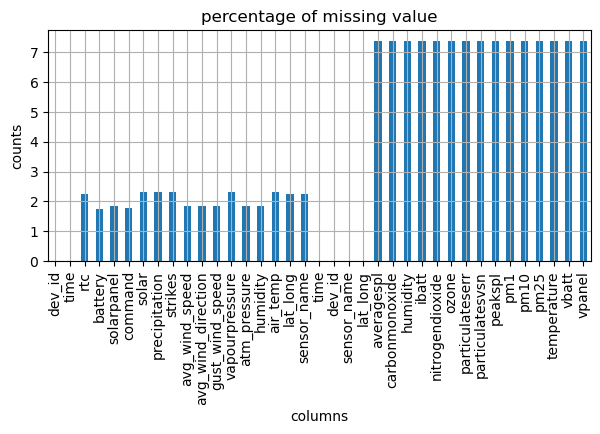

In [24]:
plt.figure(figsize=(7,3))
new_par = missing_percent[missing_percent <= 10].plot.bar()
plt.gca().set_xlabel("columns")
plt.gca().set_ylabel("counts")
plt.gca().set_title("percentage of missing value")
plt.grid()
plt.show()

In [25]:
##column to work with
selected_columns =['time', 'lat_long','rtc', 'battery', 'solarpanel', 'command', 'solar',
       'precipitation', 'strikes', 'avg_wind_speed', 'avg_wind_direction',
       'gust_wind_speed', 'vapourpressure', 'atm_pressure', 'humidity',
       'air_temp', 'lat_long',   'averagespl', 'carbonmonoxide', 'humidity', 'ibatt',
       'nitrogendioxide', 'ozone', 'particulateserr', 'particulatesvsn',
       'peakspl', 'pm1', 'pm10', 'pm25', 'temperature', 'vbatt', 'vpanel']


new_df = combine_df[selected_columns]
new_df.head()

,time,time,lat_long,lat_long,rtc,battery,solarpanel,command,solar,precipitation,...,ozone,particulateserr,particulatesvsn,peakspl,pm1,pm10,pm25,temperature,vbatt,vpanel
0,2021-05-14T18:11:23+00:00,2020-06-09T09:02:38+00:00,"-37.8022141, 144.9656262","-37.802772, 144.9655513",10090042.0,4.161,0.024,0.0,0.0,0.0,...,137.0,0.0,151.0,69.0,12.0,19.0,17.0,12.3,3.96,0.00
1,2022-05-03T10:25:31+00:00,2020-06-09T11:17:37+00:00,"-37.8022141, 144.9656262","-37.802772, 144.9655513",17564045.0,4.181,0.000,0.0,0.0,0.0,...,156.0,0.0,151.0,62.0,15.0,24.0,22.0,10.9,3.93,0.00
2,2022-05-03T21:42:23+00:00,2022-05-03T21:46:34+00:00,"-37.8022141, 144.9656262","-37.802772, 144.9655513",17604657.0,4.143,20.670,0.0,24.0,0.0,...,137.0,0.0,151.0,64.0,0.0,0.0,0.0,15.1,3.76,16.33
3,2022-05-04T00:42:43+00:00,2020-06-09T11:32:37+00:00,"-37.8022141, 144.9656262","-37.802772, 144.9655513",17615477.0,4.208,20.694,0.0,68.0,0.0,...,156.0,0.0,151.0,68.0,19.0,29.0,24.0,10.5,3.92,0.00
4,2021-05-15T07:55:22+00:00,2021-05-15T06:04:33+00:00,"-37.8022141, 144.9656262","-37.802772, 144.9655513",10139481.0,4.197,0.128,0.0,0.0,0.0,...,119.0,0.0,151.0,62.0,0.0,0.0,0.0,14.9,4.01,18.33


In [26]:
new_df.columns = ['time_1', 'time_2', 'lat_long_1', 'lat_long_2', 'rtc', 'battery', 'solarpanel',
       'command', 'solar', 'precipitation', 'strikes', 'avg_wind_speed',
       'avg_wind_direction', 'gust_wind_speed', 'vapourpressure',
       'atm_pressure', 'humidity', 'humidity', 'air_temp', 'lat_long',
       'lat_long', 'averagespl', 'carbonmonoxide', 'humidity_1', 'humidity_2',
       'ibatt', 'nitrogendioxide', 'ozone', 'particulateserr',
       'particulatesvsn', 'peakspl', 'pm1', 'pm10', 'pm25', 'temperature',
       'vbatt', 'vpanel']

In [27]:
cleaned_df = new_df.drop(columns=['time_2','lat_long', 'lat_long_2','humidity','humidity_2'])

In [28]:
cleaned_df.head()

,time_1,lat_long_1,rtc,battery,solarpanel,command,solar,precipitation,strikes,avg_wind_speed,...,ozone,particulateserr,particulatesvsn,peakspl,pm1,pm10,pm25,temperature,vbatt,vpanel
0,2021-05-14T18:11:23+00:00,"-37.8022141, 144.9656262",10090042.0,4.161,0.024,0.0,0.0,0.0,0.0,4.09,...,137.0,0.0,151.0,69.0,12.0,19.0,17.0,12.3,3.96,0.00
1,2022-05-03T10:25:31+00:00,"-37.8022141, 144.9656262",17564045.0,4.181,0.000,0.0,0.0,0.0,0.0,0.54,...,156.0,0.0,151.0,62.0,15.0,24.0,22.0,10.9,3.93,0.00
2,2022-05-03T21:42:23+00:00,"-37.8022141, 144.9656262",17604657.0,4.143,20.670,0.0,24.0,0.0,0.0,0.76,...,137.0,0.0,151.0,64.0,0.0,0.0,0.0,15.1,3.76,16.33
3,2022-05-04T00:42:43+00:00,"-37.8022141, 144.9656262",17615477.0,4.208,20.694,0.0,68.0,0.0,0.0,1.01,...,156.0,0.0,151.0,68.0,19.0,29.0,24.0,10.5,3.92,0.00
4,2021-05-15T07:55:22+00:00,"-37.8022141, 144.9656262",10139481.0,4.197,0.128,0.0,0.0,0.0,0.0,2.66,...,119.0,0.0,151.0,62.0,0.0,0.0,0.0,14.9,4.01,18.33


#### checking the distribution of some features

Text(0.5, 1.0, 'air_temp')

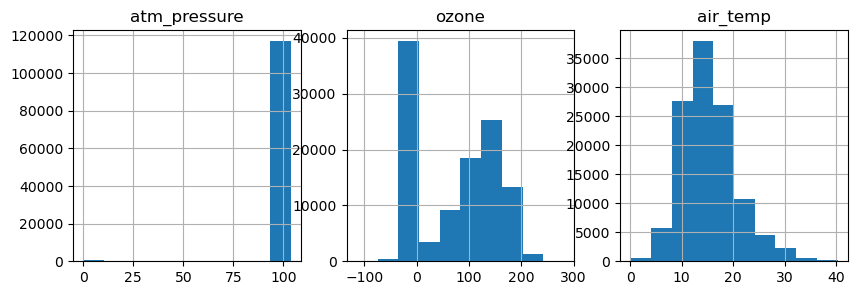

In [29]:

#trying to check the distribution of 
plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
cleaned_df['atm_pressure'].hist()
plt.title('atm_pressure')

plt.subplot(1,3,2)
cleaned_df['ozone'].hist()
plt.title('ozone')

plt.subplot(1,3,3)
cleaned_df['air_temp'].hist()
plt.title('air_temp')

In [30]:

for column in cleaned_df:
    if pd.api.types.is_numeric_dtype(cleaned_df[column]):
        cleaned_df[column].fillna(cleaned_df[column].median(), inplace=True)

# Display the DataFrame after filling NA with median
cleaned_df.head()

,time_1,lat_long_1,rtc,battery,solarpanel,command,solar,precipitation,strikes,avg_wind_speed,...,ozone,particulateserr,particulatesvsn,peakspl,pm1,pm10,pm25,temperature,vbatt,vpanel
0,2021-05-14T18:11:23+00:00,"-37.8022141, 144.9656262",10090042.0,4.161,0.024,0.0,0.0,0.0,0.0,4.09,...,137.0,0.0,151.0,69.0,12.0,19.0,17.0,12.3,3.96,0.00
1,2022-05-03T10:25:31+00:00,"-37.8022141, 144.9656262",17564045.0,4.181,0.000,0.0,0.0,0.0,0.0,0.54,...,156.0,0.0,151.0,62.0,15.0,24.0,22.0,10.9,3.93,0.00
2,2022-05-03T21:42:23+00:00,"-37.8022141, 144.9656262",17604657.0,4.143,20.670,0.0,24.0,0.0,0.0,0.76,...,137.0,0.0,151.0,64.0,0.0,0.0,0.0,15.1,3.76,16.33
3,2022-05-04T00:42:43+00:00,"-37.8022141, 144.9656262",17615477.0,4.208,20.694,0.0,68.0,0.0,0.0,1.01,...,156.0,0.0,151.0,68.0,19.0,29.0,24.0,10.5,3.92,0.00
4,2021-05-15T07:55:22+00:00,"-37.8022141, 144.9656262",10139481.0,4.197,0.128,0.0,0.0,0.0,0.0,2.66,...,119.0,0.0,151.0,62.0,0.0,0.0,0.0,14.9,4.01,18.33


In [31]:
cleaned_df.columns

Index(['time_1', 'lat_long_1', 'rtc', 'battery', 'solarpanel', 'command',
       'solar', 'precipitation', 'strikes', 'avg_wind_speed',
       'avg_wind_direction', 'gust_wind_speed', 'vapourpressure',
       'atm_pressure', 'air_temp', 'averagespl', 'carbonmonoxide',
       'humidity_1', 'ibatt', 'nitrogendioxide', 'ozone', 'particulateserr',
       'particulatesvsn', 'peakspl', 'pm1', 'pm10', 'pm25', 'temperature',
       'vbatt', 'vpanel'],
      dtype='object')

In [32]:
cleaned_df.isna().sum()*100/len(cleaned_df)

time_1                0.000000
lat_long_1            2.237135
rtc                   0.000000
battery               0.000000
solarpanel            0.000000
command               0.000000
solar                 0.000000
precipitation         0.000000
strikes               0.000000
avg_wind_speed        0.000000
avg_wind_direction    0.000000
gust_wind_speed       0.000000
vapourpressure        0.000000
atm_pressure          0.000000
air_temp              0.000000
averagespl            0.000000
carbonmonoxide        0.000000
humidity_1            0.000000
ibatt                 0.000000
nitrogendioxide       0.000000
ozone                 0.000000
particulateserr       0.000000
particulatesvsn       0.000000
peakspl               0.000000
pm1                   0.000000
pm10                  0.000000
pm25                  0.000000
temperature           0.000000
vbatt                 0.000000
vpanel                0.000000
dtype: float64

In [33]:

cleaned_df['lat_long_1'] = cleaned_df['lat_long_1'].fillna(cleaned_df['lat_long_1'].mode())

In [34]:
mode_value = cleaned_df['lat_long_1'].mode()[0]

cleaned_df['lat_long_1'] = cleaned_df['lat_long_1'].fillna(mode_value)

In [35]:
cleaned_df.isna().sum()*100/len(cleaned_df)

time_1                0.0
lat_long_1            0.0
rtc                   0.0
battery               0.0
solarpanel            0.0
command               0.0
solar                 0.0
precipitation         0.0
strikes               0.0
avg_wind_speed        0.0
avg_wind_direction    0.0
gust_wind_speed       0.0
vapourpressure        0.0
atm_pressure          0.0
air_temp              0.0
averagespl            0.0
carbonmonoxide        0.0
humidity_1            0.0
ibatt                 0.0
nitrogendioxide       0.0
ozone                 0.0
particulateserr       0.0
particulatesvsn       0.0
peakspl               0.0
pm1                   0.0
pm10                  0.0
pm25                  0.0
temperature           0.0
vbatt                 0.0
vpanel                0.0
dtype: float64

In [36]:
cleaned_df.tail()

,time_1,lat_long_1,rtc,battery,solarpanel,command,solar,precipitation,strikes,avg_wind_speed,...,ozone,particulateserr,particulatesvsn,peakspl,pm1,pm10,pm25,temperature,vbatt,vpanel
119657,2024-08-04T15:08:56+00:00,"-37.8022141, 144.9656262",88774345.0,4.153,0.225,0.0,0.0,0.0,0.0,0.86,...,78.0,0.0,151.0,72.0,3.0,5.0,5.0,24.9,3.88,0.00
119658,2024-08-04T16:39:49+00:00,"-37.8022141, 144.9656262",88779790.0,4.147,0.217,0.0,0.0,0.0,0.0,0.91,...,91.0,0.0,151.0,69.0,1.0,2.0,1.0,15.4,3.86,16.41
119659,2024-08-04T17:24:47+00:00,"-37.8022141, 144.9656262",88782495.0,4.145,0.217,0.0,0.0,0.0,0.0,0.66,...,68.0,0.0,151.0,67.0,4.0,6.0,6.0,24.1,3.88,0.00
119660,2024-08-04T16:54:39+00:00,"-37.8022141, 144.9656262",88780680.0,4.146,0.217,0.0,0.0,0.0,0.0,0.85,...,87.0,0.0,151.0,67.0,3.0,5.0,5.0,23.4,3.88,0.00
119661,2024-08-04T17:09:22+00:00,"-37.8022141, 144.9656262",88781570.0,4.146,0.233,0.0,0.0,0.0,0.0,0.72,...,87.0,0.0,151.0,66.0,6.0,7.0,7.0,22.8,3.87,0.00


##### ANalysis

#### Variation od Avg_Wind_speed and Gust_Wind_speed

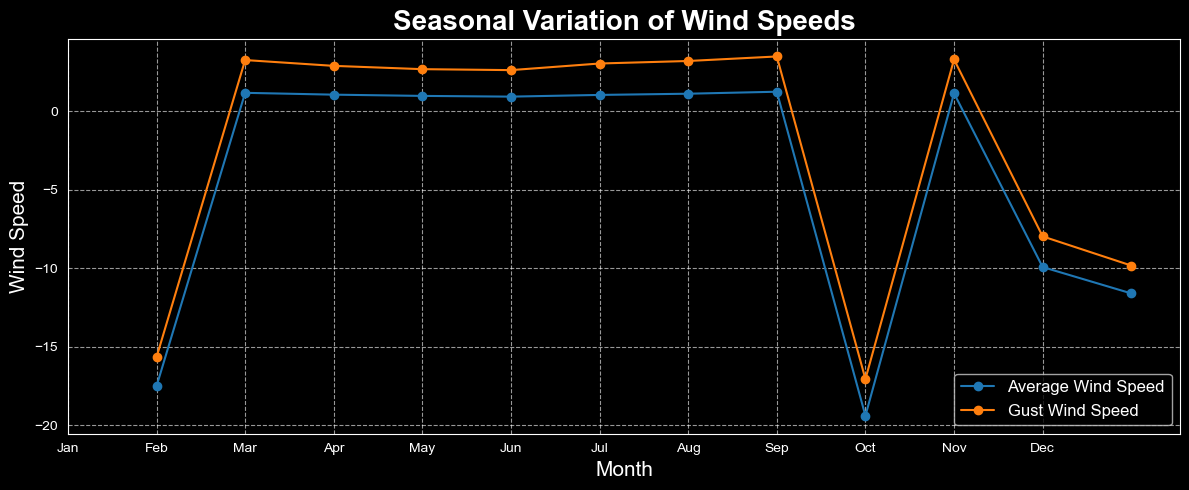

In [37]:

# Convert 'time_1' to datetime
cleaned_df['time_1'] = pd.to_datetime(cleaned_df['time_1'])

# Extract the month
cleaned_df['month'] = cleaned_df['time_1'].dt.month

# Calculate monthly means
monthly_avg = cleaned_df.groupby('month')[['avg_wind_speed', 'gust_wind_speed']].mean()

# Ensure all months are represented, even if some months might not have data
all_months = pd.DataFrame({'month': np.arange(1, 13)})
monthly_avg = all_months.merge(monthly_avg, on='month', how='left').set_index('month')

# Set the background style to dark
sns.set_style('darkgrid')
plt.style.use('dark_background')

# Plot monthly means
plt.figure(figsize=(12, 5))
ax = monthly_avg.plot(kind='line', marker='o', linestyle='-', ax=plt.gca(), color=['#1f77b4', '#ff7f0e'])
plt.title('Seasonal Variation of Wind Speeds', fontsize=20, fontweight='bold', color='white')
plt.xlabel('Month', fontsize=15, color='white')
plt.ylabel('Wind Speed', fontsize=15, color='white')
plt.xticks(ticks=np.arange(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], color='white')
plt.yticks(color='white')
plt.legend(['Average Wind Speed', 'Gust Wind Speed'], fontsize=12)

# Customize the plot appearance
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.tick_params(colors='white')
ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


The graph shows the seasonal variation of average wind speed and gust wind speed throughout the year. In February and September, both average and gust wind speeds peak, indicating stronger winds during these months. Conversely, December and October experience significant drops in wind speeds, with December starting low and October having a notable decline after the September peak.
This  behavior during these periods may be due to changes seen in the winter and autumn months.

#### Impact of Vapour Pressure on Humidity

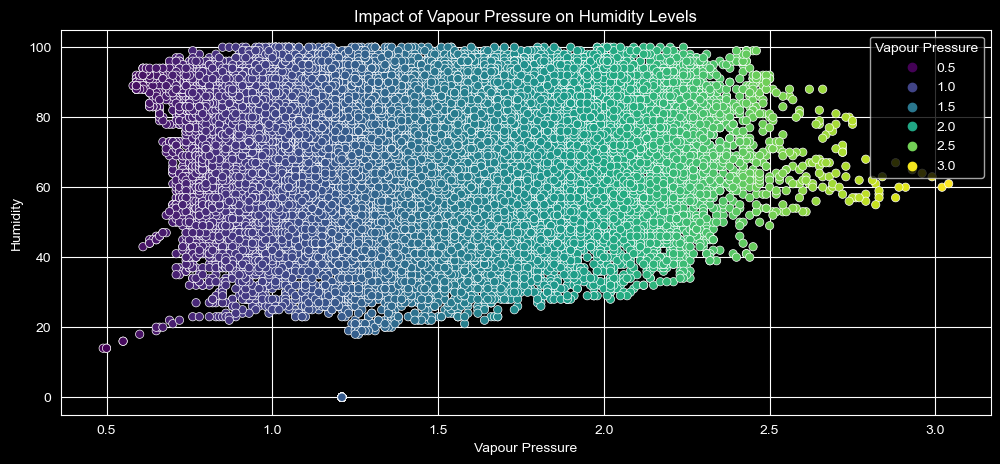

In [65]:

# Set up the plotting area
plt.figure(figsize=(12, 5))
plt.style.use('dark_background')

# Create scatter plot with a gradient based on density
sns.scatterplot(x='vapourpressure', y='humidity_1', data=cleaned_df, hue='vapourpressure', palette='viridis')

# Set plot title and labels
plt.title('Impact of Vapour Pressure on Humidity Levels', color='white')
plt.xlabel('Vapour Pressure', color='white')
plt.ylabel('Humidity', color='white')
plt.legend(title='Vapour Pressure', loc='upper right')

# Show the plot
plt.show()


The scatter plot shows how vapour pressure and humidity levels are related, using different colors to represent various vapour pressure values. Higher vapour pressure, shown in green and yellow, usually goes along with higher humidity levels. Most data points fall between 1.0 and 2.5 vapour pressure units, with humidity levels ranging from 0% to 100%.

When humidity levels are high (above 60%), vapour pressure values are spread out but tend to be higher. On the other hand, when humidity is low (below 40%), vapour pressure is generally lower, shown in purple and blue. This pattern suggests that higher humidity often means higher vapour pressure and more concentrated vapour pressure, though there is some variation.

####  Patterns in Air Temperature, Humidity, and Pressure

<Figure size 1200x600 with 0 Axes>

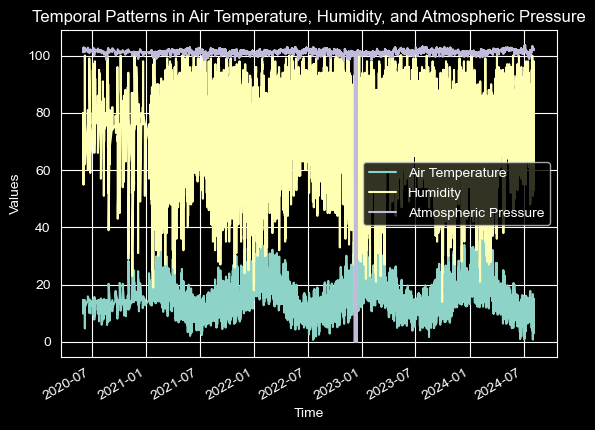

In [66]:
plt.figure(figsize=(12, 6))
cleaned_df[['air_temp', 'humidity_1', 'atm_pressure']].plot()
plt.title('Temporal Patterns in Air Temperature, Humidity, and Atmospheric Pressure')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend(['Air Temperature', 'Humidity', 'Atmospheric Pressure'])
plt.show()

The graph shows a moist environment as a result of the consistent high humidity levels.
The air temperature, fluctuates a lot, suggesting regular cycles like daily or seasonal changes.
The atmospheric pressure remains stable, which might indicate that significant weather changes might not be frequent.

#### patterns of pollutants across the year

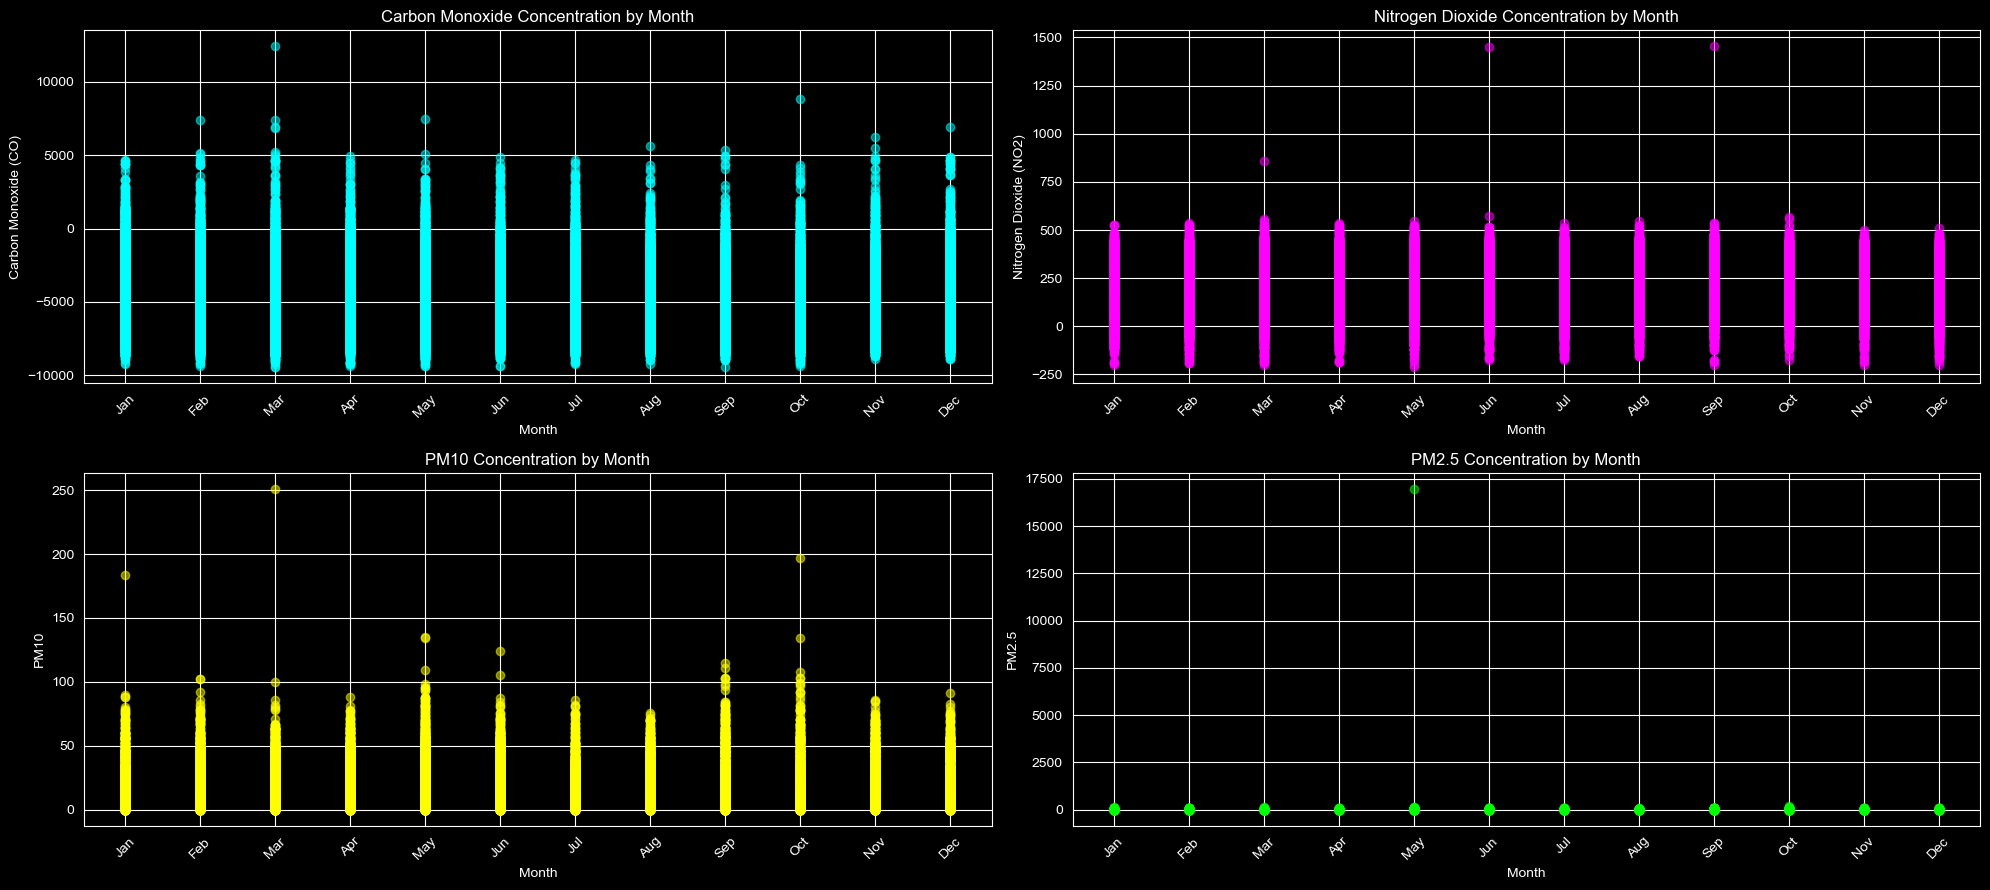

In [68]:

plt.figure(figsize=(20, 9))
plt.style.use('dark_background')

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plot for Carbon Monoxide
plt.subplot(2, 2, 1)
plt.scatter(cleaned_df['month'], cleaned_df['carbonmonoxide'], color='cyan', alpha=0.5)
plt.title('Carbon Monoxide Concentration by Month', color='white')
plt.xlabel('Month', color='white')
plt.ylabel('Carbon Monoxide (CO)', color='white')
plt.xticks(range(1, 13), months, rotation=45, color='white')
plt.yticks(color='white')

# Plot for Nitrogen Dioxide
plt.subplot(2, 2, 2)
plt.scatter(cleaned_df['month'], cleaned_df['nitrogendioxide'], color='magenta', alpha=0.5)
plt.title('Nitrogen Dioxide Concentration by Month', color='white')
plt.xlabel('Month', color='white')
plt.ylabel('Nitrogen Dioxide (NO2)', color='white')
plt.xticks(range(1, 13), months, rotation=45, color='white')
plt.yticks(color='white')

# Plot for PM10
plt.subplot(2, 2, 3)
plt.scatter(cleaned_df['month'], cleaned_df['pm10'], color='yellow', alpha=0.5)
plt.title('PM10 Concentration by Month', color='white')
plt.xlabel('Month', color='white')
plt.ylabel('PM10', color='white')
plt.xticks(range(1, 13), months, rotation=45, color='white')
plt.yticks(color='white')

# Plot for PM2.5
plt.subplot(2, 2, 4)
plt.scatter(cleaned_df['month'], cleaned_df['pm25'], color='lime', alpha=0.5)
plt.title('PM2.5 Concentration by Month', color='white')
plt.xlabel('Month', color='white')
plt.ylabel('PM2.5', color='white')
plt.xticks(range(1, 13), months, rotation=45, color='white')
plt.yticks(color='white')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


Carbon Monoxide (CO) and Nitrogen Dioxide (NO2):

These pollutants have levels that go up and down every month, but there are no clear trends showing they are increasing or decreasing over time. This suggests that the sources of these pollutants, like cars and factories, are consistent throughout the year.

PM10 and PM2.5:
In terms pf PM10(particulate matter) levels also fluctuate each month without a clear trend, which might be due to weather changes or different activities.
PM2.5(particulate matter) levels are stable and low throughout the year, indicating that efforts to control this pollutant might be effective.

#### Efect of pollutants across different years

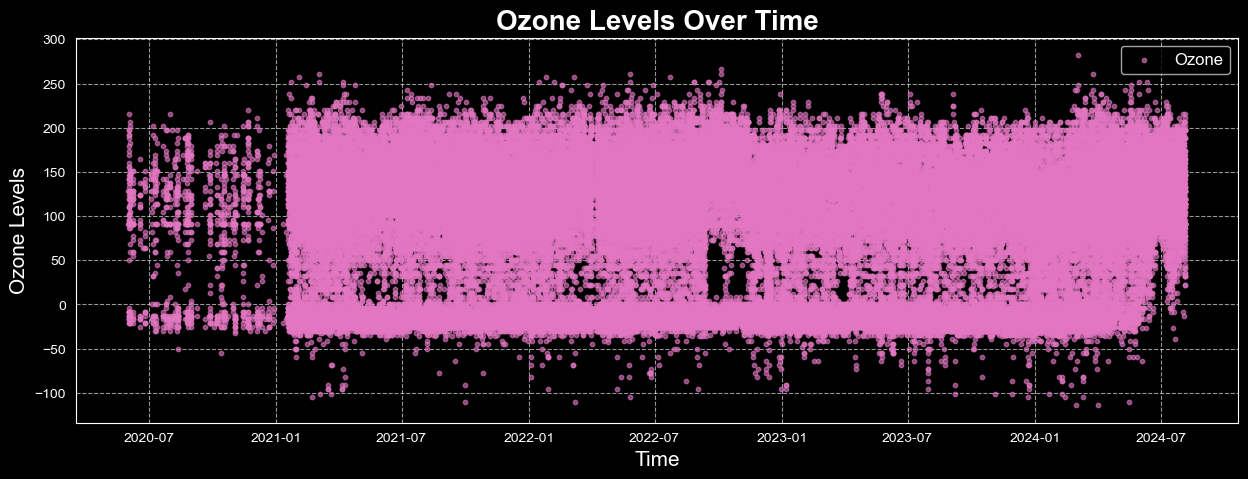

In [70]:
plt.figure(figsize=(15, 5))
plt.scatter(cleaned_df.index, cleaned_df['ozone'], label='Ozone', color='#e377c2', alpha=0.6, s=10)
plt.title('Ozone Levels Over Time', fontsize=20, fontweight='bold', color='white')
plt.xlabel('Time', fontsize=15, color='white')
plt.ylabel('Ozone Levels', fontsize=15, color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.style.use('dark_background')
plt.show()

The graph shows that ozone levels have been fairly consistent from 2021 to 2024, with most measurements densely clustered between 100 and 200 units. This indicates that the pollutant levels have remained stable over these years. The consistency in ozone levels suggests that the sources of pollution have not changed significantly.

If this trend continues, it could have a lasting impact on air quality and health in the future. Monitoring and addressing these  pollutant levels are important to prevent negative effects.

***

_**DELETE BEFORE PUBLISHING**_

## Style guide for use cases

### Headers

For styling within your markdown cells, there are two choices you can use for headers.

1) You can use HTML classes specific to the use case styling:

```<p class="usecase-subsection-header">This is a subsection header.</p>```

<p style="font-weight: bold; font-size: 1.2em;">This is a subsection header.</p>

```<p class="usecase-subsection-blurb">This is a blurb header.</p>```

<p style="font-weight: bold; font-size: 1em; font-style:italic;">This is a blurb header.</p>


2) Or if you like you can use the markdown header styles:

```# for h1```

```## for h2```

```### for h3```

```#### for h4```

```##### for h5```

## Plot colour schemes

General advice:
1. Use the same colour or colour palette throughout your notebook, unless variety is necessary
2. Select a palette based on the type of data being represented
3. Consider accessibility (colourblindness, low vision)

#### 1) If all of your plots only use 1-2 colors use one of the company style colors:

| Light theme | Dark Theme |
|-----|-----|
|<p style="color:#2af598;">#2af598</p>|<p style="color:#08af64;">#08af64</p>|
|<p style="color:#22e4ac;">#22e4ac</p>|<p style="color:#14a38e;">#14a38e</p>|
|<p style="color:#1bd7bb;">#1bd7bb</p>|<p style="color:#0f9295;">#0f9295</p>|
|<p style="color:#14c9cb;">#14c9cb</p>|<p style="color:#056b8a;">#056b8a</p>|
|<p style="color:#0fbed8;">#0fbed8</p>|<p style="color:#121212;">#121212</p>|
|<p style="color:#08b3e5;">#08b3e5</p>||


#### 2) If your plot needs multiple colors, choose an appropriate palette using either of the following tutorials:
- https://seaborn.pydata.org/tutorial/color_palettes.html
- https://matplotlib.org/stable/tutorials/colors/colormaps.html

#### 3) Consider accessibility as well.

For qualitative plotting Seaborn's 'colorblind' palette is recommended. For maps with sequential or diverging it is recommended to use one of the Color Brewer schemes which can be previewed at https://colorbrewer2.org/.

If you want to design your own colour scheme, it should use the same principles as Cynthia Brewer's research (with variation not only in hue but also, saturation or luminance).

### References

Be sure to acknowledge your sources and any attributions using links or a reference list.

If you have quite a few references, you might wish to have a dedicated section for references at the end of your document, linked using footnote style numbers.

You can connect your in-text reference by adding the number with a HTML link: ```<a href="#fn-1">[1]</a>```

and add a matching ID in the reference list using the ```<fn>``` tag: ```<fn id="fn-1">[1] Author (Year) _Title_, Publisher, Publication location.</fn>```